# Window Trigger Rates

The command used to generate this notebook was: `./scanwindow -r6-11-0.05 -w258 -v3`  

Meaning that it took data from 6 MeV to 11 MeV, each bin having a width of 0.05 and taking data for 2580 seconds or 43 minutes per bin.

This data was taken with the PuBe source.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp
from scipy import constants

In [2]:
#Import data
dataPuBe = pd.read_csv ("data/3day_high.csv")
thslPuBe = dataPuBe.iloc[:,0]
thsuPuBe = dataPuBe.iloc[:,1]
ratePuBe = dataPuBe.iloc[:,2]

thrsPuBe = [x + 0.05/2 for x in thslPuBe]

#Cut an ill-behaved region
#ratePuBe = ratePuBe[thrsPuBe > 220]
#thrsPuBe = thrsPuBe[thrsPuBe > 220]

del dataPuBe

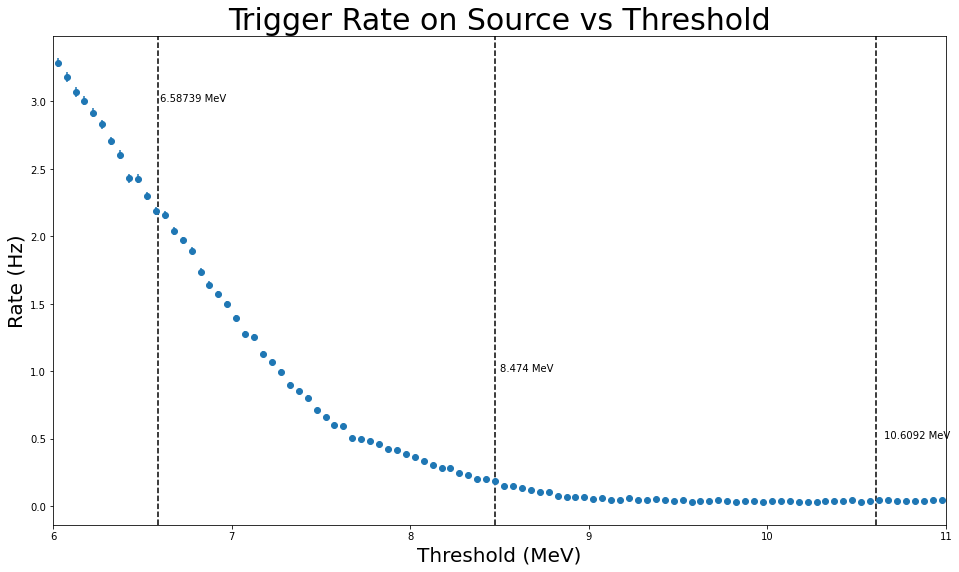

Note: threshold refers to average of upper and lower thresholds; in this case, the lower threshold + 0.025 MeV.


In [3]:
plt.figure(figsize=(16,9))

errors = np.sqrt(ratePuBe*2580)/2580
for i,x in enumerate(ratePuBe):
    if x*2580 < 10:
        print(i) #if anything prints here, we need to figure out how to recalculate these points

plt.errorbar(thrsPuBe,ratePuBe,yerr=errors,label="Data",fmt='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Source vs Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#plt.yscale('log')
#plt.xlim(150)
#straight-to-ground for capture on stable Si
plt.axvline(8.474,linestyle='--',color='k')
plt.text(8.5,1,"8.474 MeV")
plt.axvline(10.6092,linestyle='--',color='k')
plt.text(10.65,0.5,"10.6092 MeV")
plt.axvline(6.58739,linestyle='--',color='k')
plt.text(6.6,3,"6.58739 MeV")
def compton(energy): #finding the strongest effect only here
    return energy/(1+energy*1000*(1+1)/(constants.c**2*constants.m_e))

plt.xlim(min(thslPuBe),max(thsuPuBe))

#compton edges for capture on stable Si
#All of them appear to be outside the plotted region
plt.axvline(compton(8.474),linestyle='--',color='k')
#plt.text(compton(8.5),1,str(compton(8.474))+" MeV")
plt.axvline(compton(10.6092),linestyle='--',color='k')
#plt.text(compton(10.7),0.5,str(compton(10.6092))+" MeV")
plt.axvline(compton(6.58739),linestyle='--',color='k')
#plt.text(compton(6.6),4,str(compton(6.58739))+" MeV")

#plt.legend()
plt.show()
print("Note: threshold refers to average of upper and lower thresholds; in this case, the lower threshold + 0.025 MeV.")

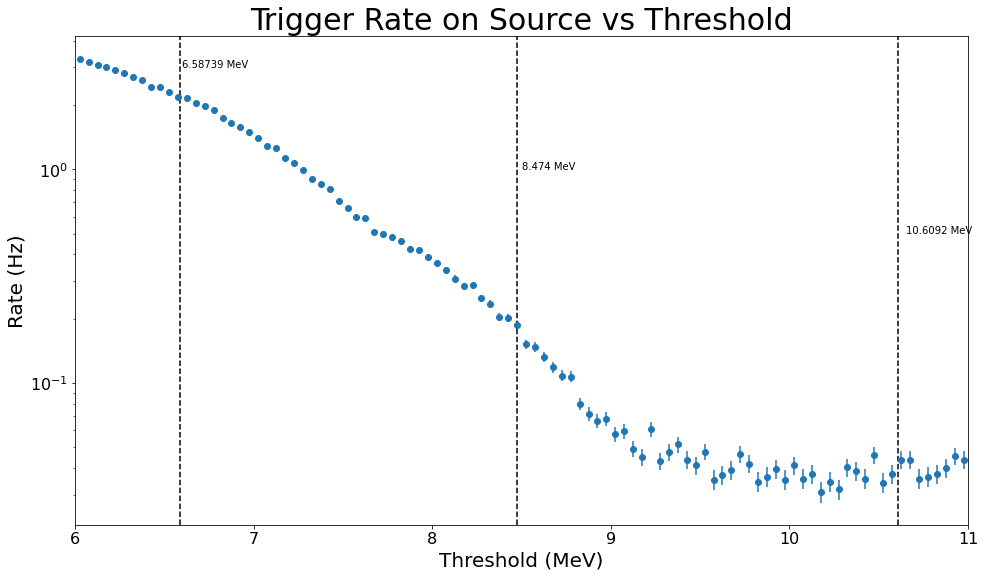

Note: threshold refers to average of upper and lower thresholds; in this case, the lower threshold + 0.025 MeV.


In [7]:
plt.figure(figsize=(16,9))

errors = np.sqrt(ratePuBe*2580)/2580
for i,x in enumerate(ratePuBe):
    if x*2580 < 10:
        print(i) #if anything prints here, we need to figure out how to recalculate these points

plt.errorbar(thrsPuBe,ratePuBe,yerr=errors,label="Data",fmt='o')

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Source vs Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#plt.yscale('log')
#plt.xlim(150)
#straight-to-ground for capture on stable Si
plt.axvline(8.474,linestyle='--',color='k')
plt.text(8.5,1,"8.474 MeV")
plt.axvline(10.6092,linestyle='--',color='k')
plt.text(10.65,0.5,"10.6092 MeV")
plt.axvline(6.58739,linestyle='--',color='k')
plt.text(6.6,3,"6.58739 MeV")
def compton(energy): #finding the strongest effect only here
    return energy/(1+energy*1000*(1+1)/(constants.c**2*constants.m_e))

plt.xlim(6,max(thsuPuBe))
plt.yscale('log')

#compton edges for capture on stable Si
#All of them appear to be outside the plotted region
plt.axvline(compton(8.474),linestyle='--',color='k')
#plt.text(compton(8.5),1,str(compton(8.474))+" MeV")
plt.axvline(compton(10.6092),linestyle='--',color='k')
#plt.text(compton(10.7),0.5,str(compton(10.6092))+" MeV")
plt.axvline(compton(6.58739),linestyle='--',color='k')
#plt.text(compton(6.6),4,str(compton(6.58739))+" MeV")

#plt.legend()
plt.show()
print("Note: threshold refers to average of upper and lower thresholds; in this case, the lower threshold + 0.025 MeV.")